# Explorative Data Analysis

The goal of this notebook is to have a first look at the data set provided with focus on the features. It will be covering the following steps:
* Explore correlation between features and target (SalePrice)
* Identify important features
* Identify identical features
* Deal with missing values
The final output will be a cleaned data set in form of a csv-file. The cleaned data set can then be analysed to predict the SalePrice of the test data.

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Load the data sets
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')


In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We can see both numerical and categorical features. There are also features including many NaN values. This will be something we have to take care of later.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Correlation between features and target

We start with a look at the correlation of each feature with the target. This allows us to get a feel for which features will be important and which features might be irrelevant.

/tmp/ipykernel_20/191846104.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_train.corr()


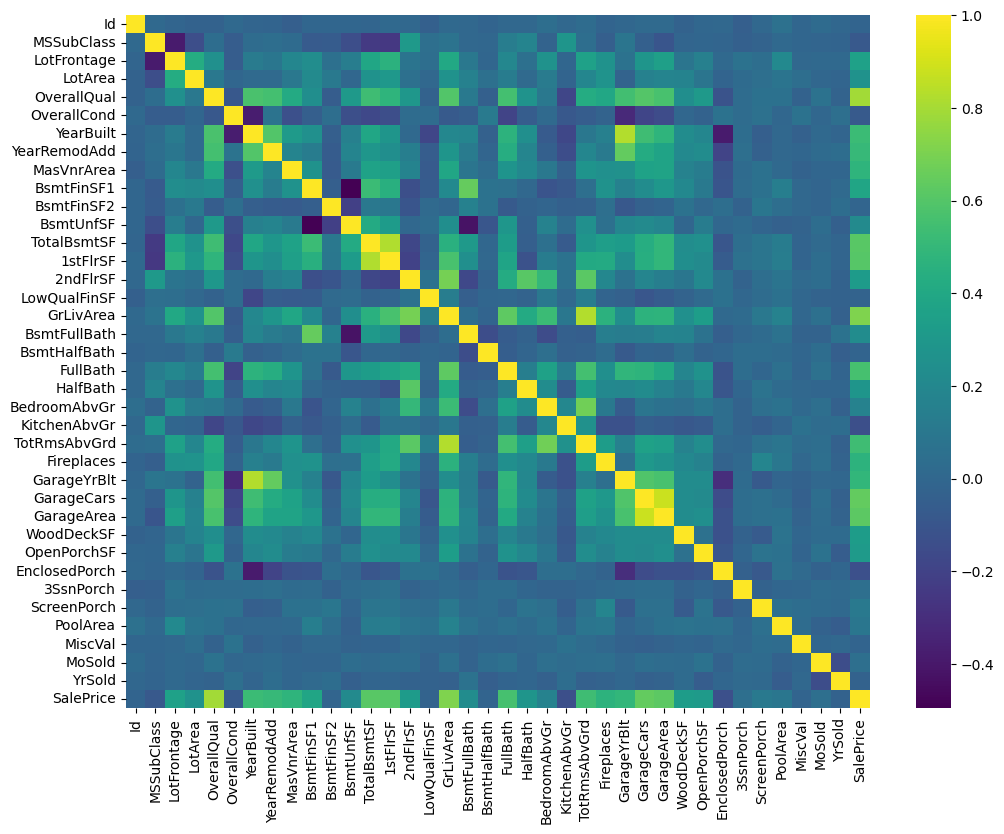

In [5]:
#correlation matrix
#Using the scientists favourite colormap viridis
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, cmap='viridis');

Having a look at the bottom row gives us an idea of which features show strong correlation between the SalePrize and the features. Everything green to yellow shows strong significant correlation.

Let's narrow down on the top 10 contributions

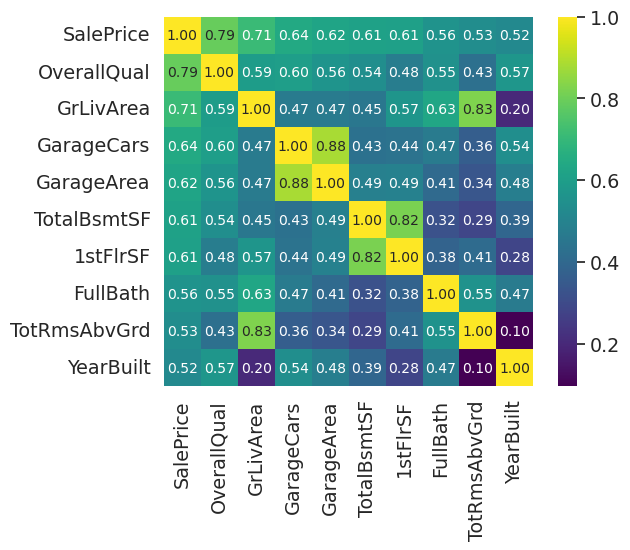

In [6]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, cmap='viridis', square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

OverallQual shows the strongest correlation followed by the GrLivArea. Furthermore, we see that several features are strongly correlated such as the GarageArea and GarageCars. This makes sense.

## Cross-correlation between features

Our first look at the correlation heatmap has shown that several features are strongly correlated with each other. This means some features might contain the same information and can be dropped. 

We list the features that are correlated the strongest

In [7]:
cross_corr_mat = df_train.drop('SalePrice', axis=1) # Drop Sale price as we are only interested in feature correlation
cross_corr_mat = cross_corr_mat.corr()
cross_corr_mat.unstack().sort_values(ascending=False).drop_duplicates().head(15)

/tmp/ipykernel_20/4143444747.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cross_corr_mat = cross_corr_mat.corr()


Id            Id              1.000000
GarageArea    GarageCars      0.882475
GarageYrBlt   YearBuilt       0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
2ndFlrSF      GrLivArea       0.687501
TotRmsAbvGrd  BedroomAbvGr    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
YearRemodAdd  GarageYrBlt     0.642277
FullBath      GrLivArea       0.630012
2ndFlrSF      TotRmsAbvGrd    0.616423
              HalfBath        0.609707
GarageCars    OverallQual     0.600671
OverallQual   GrLivArea       0.593007
YearRemodAdd  YearBuilt       0.592855
dtype: float64

GarageArea and GarageCars is strongly correlated. 
* We keep GarageCars and drop GarageArea

GarageYrBlt and YearBuilt are also strongly correlated. House and Garage were built together. 
* We drop GarageYrBlt

GrLivArea and TotRmsAbvGrd: Living area and number of rooms are correlated.
TotalBsmtSF and 1stFlrS: First floor and basement are generally the same size explaining this correlation
* Add a feature calculating the total living area (with and without basement)

In [8]:
df_all = pd.concat((df_train, df_test)).reset_index(drop=True)

In [9]:
#Drop features mention above
df_all = df_all.drop(['Id','GarageYrBlt','GarageArea'], axis=1)
#df_all = df_all.drop(['Id'], axis=1)

#df_train = df_train.drop(['Id','GarageYrBlt','GarageArea'], axis=1)
#df_test = df_test.drop(['Id','GarageYrBlt','GarageArea'], axis=1)


## Missing Numbers

Now, we have a closer look at the features and how they are distributed. Furthermore, we examine missing numbers and fill them in smartly using information from other features.

In [10]:
num_na = (df_all.isnull().sum() / len(df_all))
num_na = num_na.drop(num_na[num_na == 0].index).sort_values(ascending=False)[:30]
num_na = pd.DataFrame({'Missing Ratio' :num_na})
num_na.head(20)

,Missing Ratio
PoolQC,0.996574
MiscFeature,0.964029
Alley,0.932169
Fence,0.804385
SalePrice,0.499829
FireplaceQu,0.486468
LotFrontage,0.166495
GarageCond,0.054471
GarageFinish,0.054471
GarageQual,0.054471


The above features miss data. There are a couple of features missing a lot of values. We need examine these further to see if data is missing or missing data equals zero. Such as PoolQC, Fence, Alley could be that NaN means non-applicable or zero. For the data missing only very little data it might be reasonable to just fill in the missing numbers.

We first plot all the features, then we go one-by-one dealing with the missing values

In [11]:
#df_train.hist(figsize=(16, 20), bins=60, xlabelsize=8, ylabelsize=8);

### PoolQC

There's a lot of additional information in the data description file. We will use this to fill in most of the missing features. Such as for PoolQC where NaN means no pool. For this example, we plot the barplots for PoolQC. We only do this where necessary in the following

In [12]:
#df_test['PoolQC'].fillna('None').value_counts().plot(kind='bar')


Here we will fill in all the the places where NA means None, this includes:

**PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, MasVnrType, MSSubClass**

In [13]:
for feature in ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageType",
       "GarageFinish", "GarageQual", "GarageCond", "BsmtQual", "BsmtCond", "BsmtExposure",
       "BsmtFinType1", "BsmtFinType2", 'MasVnrType', "MSSubClass"]:
    df_all[feature]=df_all[feature].fillna("None")

Similarly, there are feature where NA means 0, these include:

**MasVnrArea , BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath and GarageCars**


In [14]:
for feature in ["MasVnrArea" , "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", 
#                "BsmtFullBath", "BsmtHalfBath", "GarageCars", "GarageYrBlt", "GarageArea"]:
                "BsmtFullBath", "BsmtHalfBath", "GarageCars"]:

    df_all[feature]=df_all[feature].fillna(0)


For the following features, we have to fill the missing values indeed represent missing values. Therefore, we fill them in with "smart"guesses. The general strategy will be using the median or mean from certain categories.

**LotFrontage**: Houses in the same neighbourhood will most likely have a similar frontage. Therefore, we use the median LotFrontage in the neighborhood to fill in the missing values

In [15]:
df_all["LotFrontage"] = df_all.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

**MSZoning**: This is the general zoning classification. We see that the majority of MSZoning are "RL". So, we fill in "RL" for the missing values/

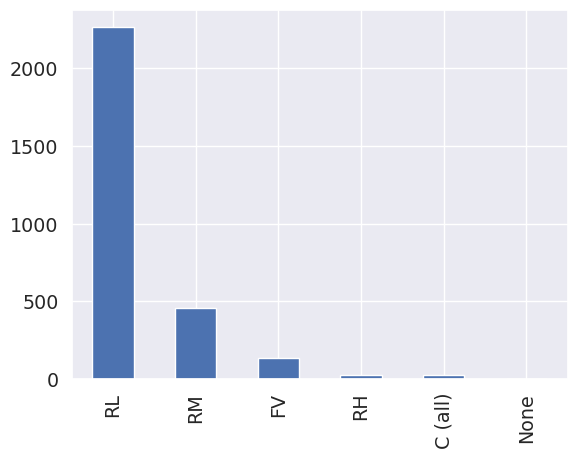

In [16]:
df_all['MSZoning'].fillna('None').value_counts().plot(kind='bar')
df_all["MSZoning"] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])

**Utilities**: Here, almost all the records are "AllPub". Furthermore, the "NoSeWa" only appears in the test set. Thus, there is no correlation for this feature and we can drop it

In [17]:
df_all['Utilities'].fillna('None').value_counts()

AllPub    2916
None         2
NoSeWa       1
Name: Utilities, dtype: int64

In [18]:
df_all = df_all.drop(['Utilities'], axis=1)

**Functional**: From the data description we get that NA means typical

In [19]:
df_all["Functional"] = df_all["Functional"].fillna("Typ")

**Electrical**: This feature only has a single NA value. Most of the values are "SBrkr", so we fill in with the median.

In [20]:
df_all['Electrical'].fillna('None').value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
None        1
Name: Electrical, dtype: int64

In [21]:
df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])

For the remaining feature we follow the same procedure using the median. The remaining features are:
**KitchenQual, Exterior1st, Exterior2nd, SaleType**

In [22]:
for features in ["KitchenQual", "Exterior1st", "Exterior2nd", "SaleType"]:
    df_all[features] = df_all[features].fillna(df_all[features].mode()[0])

Do a final check if we got rid of all the NA's

In [23]:
# We drop SalePrice for the test because it contains NAs for df_test
# If true, we can check for which feature has NAs using
#df_all.drop(['SalePrice'], axis=1).isnull().any()

df_all.drop(['SalePrice'], axis=1).isnull().values.any()


False

In [24]:
#Add new feature
df_all['TotalSF'] = df_all['TotalBsmtSF'] + df_all['1stFlrSF'] + df_all['2ndFlrSF']

In [25]:
#MSSubClass=The building class
df_all['MSSubClass'] = df_all['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df_all['OverallCond'] = df_all['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df_all['YrSold'] = df_all['YrSold'].astype(str)
df_all['MoSold'] = df_all['MoSold'].astype(str)

In [26]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_all[c].values)) 
    df_all[c] = lbl.transform(list(df_all[c].values))

# shape        
print('Shape all_data: {}'.format(df_all.shape))

Shape all_data: (2919, 78)


## Outliers

Once we are done with this, we can work the data. The plan is to apply several light regression models and see how they perform. Then, we try more powerful tools, i.e., tensorflow. We compare the values to the regression results. Finally, we use stacked ensemble regression. This should perform better than the light regression models and should be computational less expensive than the tensorflow application.

In [27]:
# Get updated df_train and df_test
ntrain = df_train.shape[0]

df_train = df_all[:ntrain]
df_test = df_all[ntrain:]

In [28]:
features_list = list(df_train)

In [29]:
len(features_list)

78

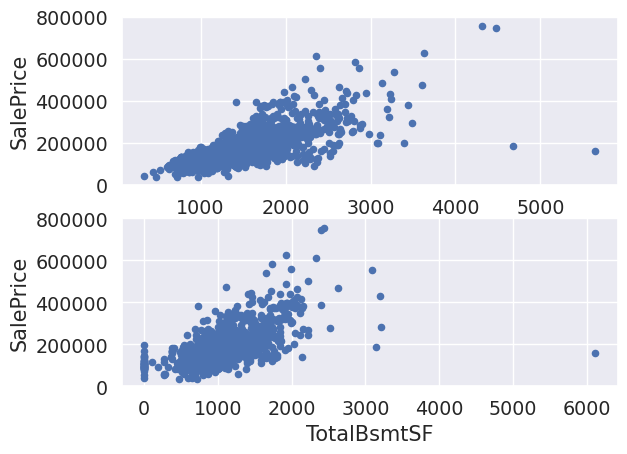

In [30]:
#scatter plot grlivarea/saleprice
fig, axes = plt.subplots(2,1)
# Check that we got rid of them
i=0
for var in ['GrLivArea','TotalBsmtSF']:
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000),ax=axes[i]);
    i+=1

We have identified two extreme outliers which have very large area but low price. Those are probably farm lands or other properties. We remove them. There are further outliers present in other features, but they are not as extreme. There is also a chance that we have outliers in our test data. So we should try to make our prediction models robust against these outliers.

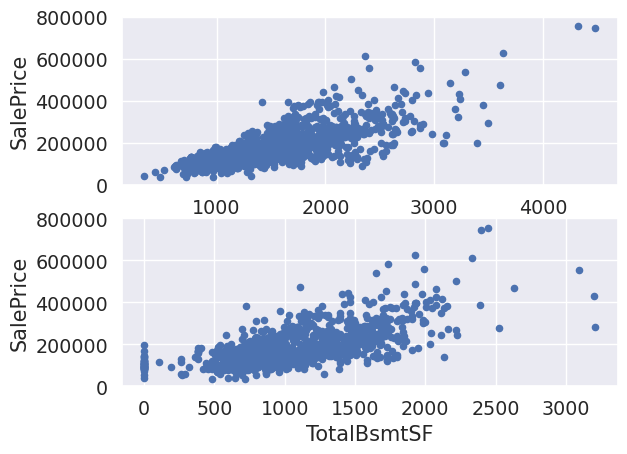

In [31]:
# Remove outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<200000)].index)

fig, axes = plt.subplots(2,1)
# Check that we got rid of them
i=0
for var in ['GrLivArea','TotalBsmtSF']:
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000),ax=axes[i]);
    i+=1

## Skewness

In [32]:

from scipy import stats
from scipy.stats import norm, skew #for some statistics

/tmp/ipykernel_20/190528656.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'] )


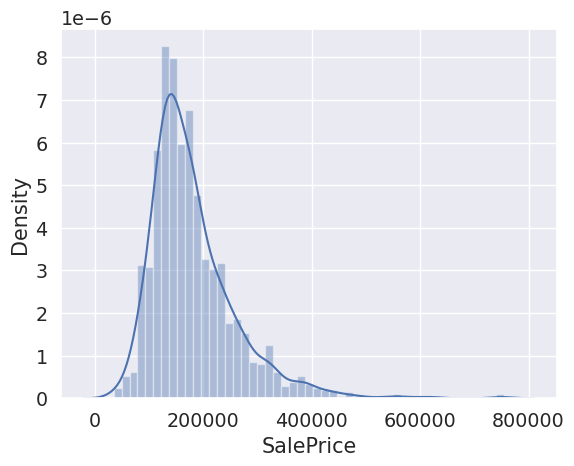

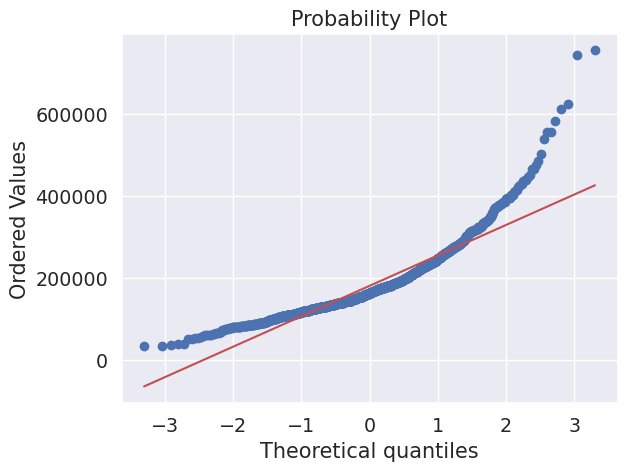

In [33]:
sns.distplot(df_train['SalePrice'] )
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

/tmp/ipykernel_20/4129601835.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'] , fit=norm);



 mu = 12.02 and sigma = 0.40



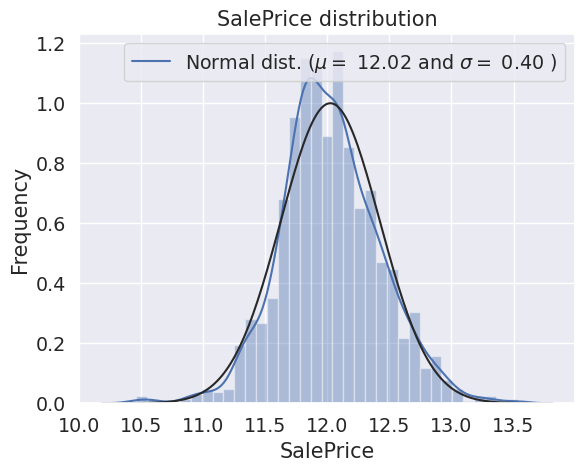

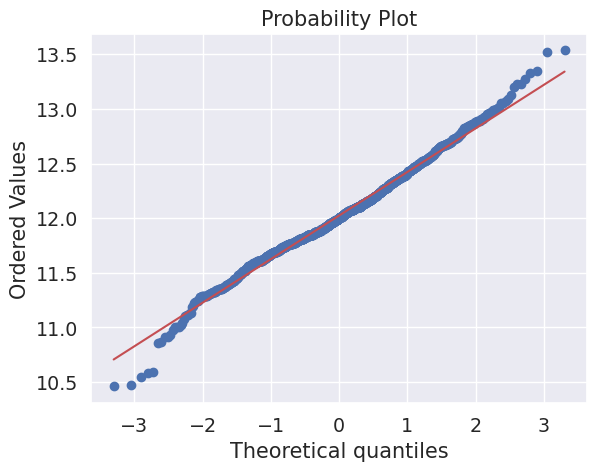

In [34]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log(1+df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [35]:
df_all = pd.concat((df_train, df_test)).reset_index(drop=True)

In [36]:
numeric_feats = df_all.dtypes[df_all.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_all[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [37]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    if feat=='SalePrice':
        continue
    #all_data[feat] += 1
    df_all[feat] = boxcox1p(df_all[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 58 skewed numerical features to Box Cox transform


In [38]:
df_all = pd.get_dummies(df_all, dtype='int32')
print(df_all.shape)

(2917, 219)


In [39]:
train = df_all[:ntrain-2].drop(["SalePrice"],axis=1)
y_train = df_all[:ntrain-2].SalePrice.values
test = df_all[ntrain-2:]

# Modelling

In [40]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [41]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [42]:
# Naive try of a simple linear regression
regr = LinearRegression()
score = rmsle_cv(regr)
print("\nLinear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Linear Regression score: 196933205.0783 (265297399.5469)



In [43]:
# Linear regression was absolutely terrible. Let's try some more advanced regression tools
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1116 (0.0072)



In [44]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("\nENet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ENet score: 0.1116 (0.0073)



In [45]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("\nKRR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


KRR score: 0.1153 (0.0080)



In [46]:
# loss='huber' makes it more robuts to our outliers
# Note that running this Model takes significantly longer
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("\nGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GBoost score: 0.1159 (0.0071)



In [47]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmsle_cv(model_xgb)
print("\nmodel_xgb score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[08:45:59] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:04] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:10] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:16] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:21] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.


model_xgb score: 0.1169 (0.0056)



In [48]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("\nmodel_lgb score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6

The different models have approximately the same predictive power. Let's use the power of ensemble predictions and stacking to improve them. We start of with a simple approach where we simple average over several models.

In [49]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

Let's start by averaging the 3 fast models

In [50]:
averaged_models = AveragingModels(models = (ENet, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1112 (0.0075)



The improvement is small around 1 std, let's include all models. This might take a couple of minutes, since the evaluation of the gradient boost models takes longer

In [51]:
averaged_models = AveragingModels(models = (ENet, KRR, lasso, GBoost))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1087 (0.0072)



We went down around half an std. So overall, from combining simply averaging the models, we went down by around 1.5 std. 

Let's add in a meta model that improves the averaging. In other words, we are weighting how much every model contributes to the final prediction.

In [52]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [53]:
stacked_averaged_models = StackingAveragedModels(base_models = (lasso, ENet, KRR,GBoost),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1084 (0.0069)


Well, this did not really help much, but okay. Not really worth the additional runtime.

In [54]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [55]:
test=test.drop(['SalePrice'],axis=1)

In [56]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.08047771983893078


In [57]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

[08:55:58] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.0795905967179058


In [58]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.0728094402359063


In [59]:
ensemble = stacked_pred*0.60 + xgb_pred*0.2 + lgb_pred*0.2

In [60]:
# Get back the IDs that we dropped earlier for 
ids = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')["Id"]

sub = pd.DataFrame()
sub['Id'] = ids[:]
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

In [61]:
sub.tail()

,Id,SalePrice
1454,2915,83004.993729
1455,2916,81775.214886
1456,2917,165070.287711
1457,2918,117259.406374
1458,2919,225128.474301


# Tensorflow

It is time to get fancy. So far, we have applied basic regression models to predict the Housing prices. Then, we stacked them to improve the forecast a bit more. In this part, we will use tensorflow decision trees to see if they can outperform the stacked regressor.

In [62]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.12.0
TensorFlow Decision Forests v1.4.0


In [63]:
df_train.shape

(1458, 78)

In [64]:
df_train = df_all[:ntrain-2]
df_test = df_all[ntrain-2:].drop('SalePrice',axis=1)

In [65]:
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(df_train)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

999 examples in training, 459 examples in testing.


In [66]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [67]:
tfdf.keras.get_all_models()


[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [68]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmplir9doif as temporary training directory


In [69]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"]) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmpn76av5nf as temporary training directory


In [70]:
rf.fit(x=train_ds)


Reading training dataset...
Training dataset read in 0:00:10.082279. Found 999 examples.
Training model...


[INFO 23-08-10 08:56:49.0629 UTC kernel.cc:1243] Loading model from path /tmp/tmpn76av5nf/model/ with prefix 512d988644844d18


Model trained in 0:00:08.492210
Compiling model...


[INFO 23-08-10 08:56:49.4581 UTC decision_forest.cc:660] Model loaded with 300 root(s), 95040 node(s), and 166 input feature(s).
[INFO 23-08-10 08:56:49.4582 UTC abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 23-08-10 08:56:49.4583 UTC kernel.cc:1075] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [71]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

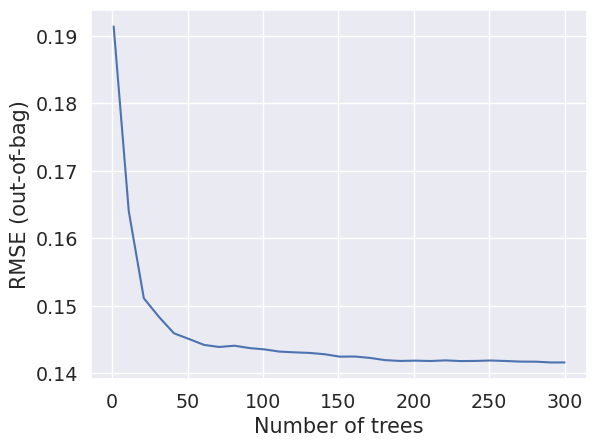

In [72]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [73]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=999, accuracy=None, loss=None, rmse=0.1416113756532335, ndcg=None, aucs=None, auuc=None, qini=None)

In [74]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - mse: 0.0155
loss: 0.0000
mse: 0.0155


In [75]:
np.sqrt(0.0164)

0.12806248474865697

In [76]:
np.sqrt(np.log1p(29660.363022492173))

3.208987467962653

In [77]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_AS_ROOT
	 NUM_NODES
	 SUM_SCORE
	 INV_MEAN_MIN_DEPTH


In [78]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #177), 131.0),
 ("TotalSF" (1; #213), 95.0),
 ("GrLivArea" (1; #99), 27.0),
 ("YearBuilt" (1; #215), 23.0),
 ("ExterQual" (1; #45), 9.0),
 ("FullBath" (1; #86), 6.0),
 ("TotalBsmtSF" (1; #212), 4.0),
 ("1stFlrSF" (1; #0), 1.0),
 ("BsmtQual" (1; #18), 1.0),
 ("Foundation_PConc" (1; #82), 1.0),
 ("GarageCars" (1; #88), 1.0),
 ("KitchenQual" (1; #117), 1.0)]

In [79]:
test_data = df_test

ids = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')["Id"]


test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': np.expm1(preds.squeeze())})

output.head()

2/2 [==============================] - 1s 103ms/step


,Id,SalePrice
0,1461,119778.179688
1,1462,156727.718750
2,1463,174207.875000
3,1464,182763.281250
4,1465,192754.531250


In [80]:
sub.head()

,Id,SalePrice
0,1461,118195.648997
1,1462,160568.064853
2,1463,185858.381857
3,1464,196465.389773
4,1465,190849.461016
